In [54]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#This function simulates the evolution starting from one type0 cell
def simulate_new(M1, M2, r, a1, a2, d, b1, b2, q, v1, eps, gam):

    t = 0

    x = 1
    y1 = 0

    z_list = []
    z_array = np.array(z_list)
    total = 1
    total_list = [total]
    treatment = False
    metastasis = False
    t_diag = 0
    
    #run the simulation until the size of the population or time reaches the limit
    while 0 < total < M2:
        
        #Gamma is the sum of the rates of all possible events
        Gamma = (r+d)*x + (a1+b1+q)*y1 + (a2+b2)*sum(z_array)
        tau = np.random.exponential(1/Gamma) #find the next time using an eponential distribution
            
        if random.random() < x*r*(1-v1) / Gamma: #type0 cell division rate
            x += 1
        if random.random() < ((x*r*v1) + y1*a1) / Gamma: #type0 cell mutation or type1 cell division
            y1 += 1
        if random.random() < y1*q / Gamma:  #type1 cell exports to new metastatic site
            y1 -= 1
            z_list.append(1) #define a new metastatic site
            metastasis = True
            
        if random.random() < x*d / Gamma: #type0 cell death rate
            x -= 1
        if random.random() < y1*b1 / Gamma: #type1 cell death rate
            y1 -= 1
        
        #division and death rates for each metastatic site
        for n in range(len(z_list)):
            if random.random() < z_list[n]*b2 / Gamma:
                z_list[n] -= 1
            if random.random() < z_list[n]*a2 / Gamma:
                z_list[n] += 1

        
        t += tau
        z_array = np.array(z_list)
        total = x + y1 + sum(z_array)

        
        if total >= M1 and treatment == False:
            r = r * (1-gam)
            a1 = a1 * (1-gam)
            a2 = a2 * (1-gam)

            x = round(x * (1-eps))
            y1 = round(y1 * (1-eps))

            t_diag = t
            treatment = True
        
    site = 0
    for z in z_array:
        if z > 0:
            site += 1
        

    return site, sum(z_array), total, metastasis

def simulate(M1, M2, r, s1, s2, s3, d, d1, d2, d3, q, v1, v2, eps, gam):

    t = 0
    x = 1
    y1 = 0
    y2 = 0
    z_list = []
    z_array = np.array(z_list)
    total = 1
    treatment = False
    metastasis = False
    t_diag = 0
    
    #run the simulation until the size of the population or time reaches the limit
    while 0 < total < M2:
        
        #Gamma is the sum of the rates of all possible events
        Gamma = (r+d)*x + (s1+d1)*y1 + (s2+d2+q)*y2 + (s3+d3)*sum(z_array)
        tau = np.random.exponential(1/Gamma) #find the next time using an eponential distribution
            
        if random.random() < x*r*(1-v1) / Gamma: #type0 cell division rate
            x += 1
        if random.random() < ((x*r*v1) + y1*s1*(1-v2)) / Gamma: #type0 cell mutation or type1 cell division
            y1 += 1
        if random.random() < (y1*s1*v2 + y2*s2) / Gamma: #type1 cell mutation or type2 cell division
            y2 += 1
        if random.random() < y2*q / Gamma:  #type2 cell exports to new metastatic site
            y2 -= 1
            z_list.append(1) #define a new metastatic site
            metastasis = True
            
        if random.random() < x*d / Gamma: #type0 cell death rate
            x -= 1
        if random.random() < y1*d1 / Gamma: #type1 cell death rate
            y1 -= 1
        if random.random() < y2*d2 / Gamma:#type2 cell death rate
            y2 -= 1
        
        #division and death rates for each metastatic site
        for n in range(len(z_list)):
            if random.random() < z_list[n]*s3 / Gamma:
                z_list[n] += 1
            if random.random() < z_list[n]*d3 / Gamma:
                z_list[n] -= 1
        
        t += tau
        z_array = np.array(z_list)
        total = x + y1 + y2 + sum(z_array)
        
        if total >= M1 and treatment == False:
            r = r * (1-gam)
            s1 = s1 * (1-gam)
            s2 = s2 * (1-gam)
            s3 = s3 * (1-gam)
            x = round(x * (1-eps))
            y1 = round(y1 * (1-eps))
            y2 = round(y2 * (1-eps))
            t_diag = t
            treatment = True

    site = 0
    for z in z_array:
        if z > 0:
            site += 1
        

    return site, sum(z_array), total, metastasis



def simulate_prog(M1, M2, r, s1, s2, s3, d, d1, d2, d3, q, v1, v2, eps, gam):

    t = 0
    x = 1
    y1 = 0
    y2 = 0
    t_list = [0]
    x_list = [1]
    y1_list = [0]
    y2_list = [0]
    zz_list = [0]
    total_list = [1]
    z_list = []
    z_array = np.array(z_list)
    total = 1
    treatment = False
    metastasis = False
    t_diag = 0
    
    #run the simulation until the size of the population or time reaches the limit
    while 0 < total < M2:
        
        #Gamma is the sum of the rates of all possible events
        Gamma = (r+d)*x + (s1+d1)*y1 + (s2+d2+q)*y2 + (s3+d3)*sum(z_array)
        tau = np.random.exponential(1/Gamma) #find the next time using an eponential distribution
            
        if random.random() < x*r*(1-v1) / Gamma: #type0 cell division rate
            x += 1
        if random.random() < ((x*r*v1) + y1*s1*(1-v2)) / Gamma: #type0 cell mutation or type1 cell division
            y1 += 1
        if random.random() < (y1*s1*v2 + y2*s2) / Gamma: #type1 cell mutation or type2 cell division
            y2 += 1
        if random.random() < y2*q / Gamma:  #type2 cell exports to new metastatic site
            y2 -= 1
            z_list.append(1) #define a new metastatic site
            metastasis = True
            
        if random.random() < x*d / Gamma: #type0 cell death rate
            x -= 1
        if random.random() < y1*d1 / Gamma: #type1 cell death rate
            y1 -= 1
        if random.random() < y2*d2 / Gamma:#type2 cell death rate
            y2 -= 1
        
        #division and death rates for each metastatic site
        for n in range(len(z_list)):
            if random.random() < z_list[n]*s3 / Gamma:
                z_list[n] += 1
            if random.random() < z_list[n]*d3 / Gamma:
                z_list[n] -= 1
        
        
        t += tau
        z_array = np.array(z_list)
        total = x + y1 + y2 + sum(z_array)
        x_list.append(x)
        y1_list.append(y1)
        y2_list.append(y2)
        zz_list.append(sum(z_array))
        total_list.append(total)
        t_list.append(t)
        
        if total >= M1 and treatment == False:
            r = r * (1-gam)
            s1 = s1 * (1-gam)
            s2 = s2 * (1-gam)
            s3 = s3 * (1-gam)
            x = round(x * (1-eps))
            y1 = round(y1 * (1-eps))
            y2 = round(y2 * (1-eps))
            t_diag = t
            treatment = True

    site = 0
    for z in z_array:
        if z > 0:
            site += 1
        

    return t_list, x_list, y1_list, y2_list, zz_list, total_list

def simulate_time(M1, M2, r, s1, s2, s3, d, d1, d2, d3, q, v1, v2, eps, gam):

    t = 0
    t_list = [t]
    x = 1
    y1 = 0
    y2 = 0
    x_list = [1]
    y1_list = [0]
    y2_list = [0]
    zcell_list = [0] 
    z_list = []
    z_array = np.array(z_list)
    total = 1
    total_list = [total]
    treatment = False
    t_diag = 0
    diag_total = 0
    
    #run the simulation until the size of the population or time reaches the limit
    while 0 < total < M2:
        
        #Gamma is the sum of the rates of all possible events
        Gamma = (r+d)*x + (s1+d1)*y1 + (s2+d2+q)*y2 + (s3+d3)*sum(z_array)
        tau = np.random.exponential(1/Gamma) #find the next time using an eponential distribution
            
        if random.random() < x*r*(1-v1) / Gamma: #type0 cell division rate
            x += 1
        if random.random() < ((x*r*v1) + y1*s1*(1-v2)) / Gamma: #type0 cell mutation or type1 cell division
            y1 += 1
        if random.random() < (y1*s1*v2 + y2*s2) / Gamma: #type1 cell mutation or type2 cell division
            y2 += 1
        if random.random() < y2*q / Gamma:  #type2 cell exports to new metastatic site
            y2 -= 1
            z_list.append(1) #define a new metastatic site
            
        if random.random() < x*d / Gamma: #type0 cell death rate
            x -= 1
        if random.random() < y1*d1 / Gamma: #type1 cell death rate
            y1 -= 1
        if random.random() < y2*d2 / Gamma:#type2 cell death rate
            y2 -= 1
        
        #division and death rates for each metastatic site
        for n in range(len(z_list)):
            if random.random() < z_list[n]*s3 / Gamma:
                z_list[n] += 1
            if random.random() < z_list[n]*d3 / Gamma:
                z_list[n] -= 1
        
        t += tau
        z_array = np.array(z_list)
        total = x + y1 + y2 + sum(z_array)
        total_list.append(total)
        t_list.append(t)
        x_list.append(x)
        y1_list.append(y1)
        y2_list.append(y2)
        zcell_list.append(sum(z_array))
        
        if total >= M1 and treatment == False:
            r = r * (1-gam)
            s1 = s1 * (1-gam)
            s2 = s2 * (1-gam)
            s3 = s3 * (1-gam)
            x = round(x * (1-eps))
            y1 = round(y1 * (1-eps))
            y2 = round(y2 * (1-eps))
            t_diag = t
            treatment = True
            diag_total = x + y1 + y2

       
    return t - t_diag, total, t_diag, t

In [3]:
s6b_red = np.ones((10, 100))
s6c_red = np.ones((10, 100))
s6b_blue = np.ones((10, 100))
s6c_blue = np.ones((10, 100))

In [4]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.3162, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_red[9,n] = numsite_1
        s6c_red[9,n] = zcells_1
        n += 1

In [5]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.1, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_red[8,n] = numsite_1
        s6c_red[8,n] = zcells_1
        n += 1

In [6]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.03162, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_red[7,n] = numsite_1
        s6c_red[7,n] = zcells_1
        n += 1

In [7]:

num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.01, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_red[6,n] = numsite_1
        s6c_red[6,n] = zcells_1
        n += 1
        print(numsite_1, zcells_1, total_1, metastasis_1)

4 29081 250000 True
3 5 250000 True
6 30 250000 True
16 19546 250000 True
101 2599 250000 True
3 6 250000 True
6 12 250001 True
31 1288 250000 True
2 5 250000 True
6 51 250000 True
4 387 250000 True
26 1229 250000 True
5 17 250000 True
7 73 250000 True
3 12 250000 True
4 6 250001 True
20 264 250000 True
5 256 250000 True
6 316 250000 True
6 139 250000 True
9 67 250001 True
4 28 250000 True
7 17 250000 True
3 4 250000 True
14 693 250000 True
7 10 250000 True
8 27 250000 True
16 117 250000 True
6 292 250000 True
16 44 250001 True
14 568 250001 True
8 16 250000 True
7 59 250000 True
6 13 250000 True
9 281 250000 True
4 5 250000 True
4 13 250000 True
15 727 250001 True
41 69268 250000 True
3 61 250000 True
8 25 250000 True
19 193 250000 True
7 34 250000 True
7 20 250000 True
6 67 250000 True
4 18 250000 True
5 37 250000 True
8 229 250000 True
3 88 250000 True
14 2461 250001 True
4 872 250000 True
19 573 250000 True
10 30 250000 True
3 11 250000 True
3 13 250000 True
11 52 250000 True
4 24 

In [8]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.003162, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_red[5,n] = numsite_1
        s6c_red[5,n] = zcells_1
        n += 1

In [9]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_red[4,n] = numsite_1
        s6c_red[4,n] = zcells_1
        n += 1

In [10]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.0003162, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_red[3,n] = numsite_1
        s6c_red[3,n] = zcells_1
        n += 1

In [11]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.0001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_red[2,n] = numsite_1
        s6c_red[2,n] = zcells_1
        n += 1

In [12]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.00003162, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_red[1,n] = numsite_1
        s6c_red[1,n] = zcells_1
        n += 1

In [13]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.00001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_red[0,n] = numsite_1
        s6c_red[0,n] = zcells_1
        n += 1

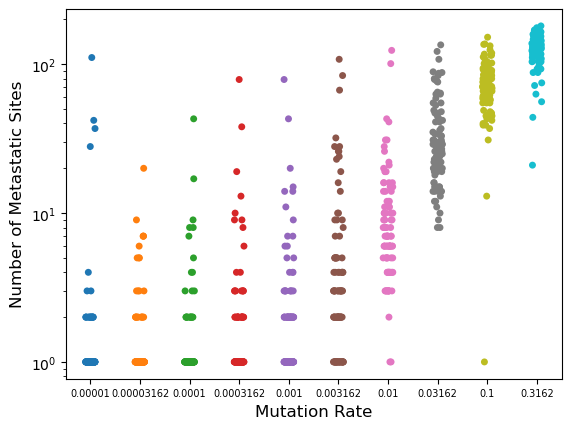

In [16]:

s6b_red_transposed = s6b_red.T
df_transposed = pd.DataFrame(s6b_red_transposed, columns=[f'Row {i+1}' for i in range(s6b_red_transposed.shape[1])])

custom_x_labels = ['0.00001', '0.00003162', '0.0001', '0.0003162', '0.001', '0.003162', '0.01', '0.03162', '0.1', '0.3162']
plt.figure()
ax = sns.stripplot(data=df_transposed)
ax.set_yscale('log')

plt.xlabel('Mutation Rate', fontsize=12)
plt.ylabel('Number of Metastatic Sites', fontsize=12)
plt.xticks(ticks=range(len(custom_x_labels)), labels=custom_x_labels, fontsize=7)
plt.show()

In [40]:
import scipy.stats as stats

s6b_red_mean = []
s6b_red_con = []
s6b_red_err = []

for n in range(10):
    s_mean = np.mean(s6b_red[n,:])
    s_std = np.std(s6b_red[n,:])
    confidence_level = 0.95
    degrees_freedom = 99
    s6b_red_mean.append(s_mean)
    confidence_interval_sites = stats.t.interval(confidence_level, degrees_freedom, s_mean, s_std/np.sqrt(num_run))
    s6b_red_con.append(confidence_interval_sites)
    
for n in range(10):
    err = s6b_red_mean[n] - s6b_red_con[n][0]
    s6b_red_err.append(err)

In [17]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.3162, v2=0.3162/2, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_blue[9,n] = numsite_1
        s6c_blue[9,n] = zcells_1
        n += 1

In [18]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.1, v2=0.1/2, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_blue[8,n] = numsite_1
        s6c_blue[8,n] = zcells_1
        n += 1

In [19]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.03162, v2=0.03162/2, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_blue[7,n] = numsite_1
        s6c_blue[7,n] = zcells_1
        n += 1

In [20]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.01, v2=0.01/2, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_blue[6,n] = numsite_1
        s6c_blue[6,n] = zcells_1
        n += 1

In [21]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.003162, v2=0.003162/2, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6b_blue[5,n] = numsite_1
        s6c_blue[5,n] = zcells_1
        n += 1

In [43]:
s6b_blue_mean = []
s6b_blue_con = []
s6b_blue_err = []

for n in range(5):
    s_mean = np.mean(s6b_blue[n+5,:])
    s_std = np.std(s6b_blue[n+5,:])
    confidence_level = 0.95
    degrees_freedom = 99
    s6b_blue_mean.append(s_mean)
    confidence_interval_sites = stats.t.interval(confidence_level, degrees_freedom, s_mean, s_std/np.sqrt(num_run))
    s6b_blue_con.append(confidence_interval_sites)
    
for n in range(5):
    err = s6b_blue_mean[n] - s6b_blue_con[n][0]
    s6b_blue_err.append(err)
    
print(s6b_blue_mean)
print(s6b_blue_con)
print(s6b_blue_err)

[1.75, 2.36, 6.85, 47.89, 137.74]
[(1.243830183672677, 2.256169816327323), (1.7259689399994207, 2.9940310600005793), (5.533707204131147, 8.166292795868852), (43.700538876150986, 52.079461123849015), (129.198660694391, 146.281339305609)]
[0.5061698163273229, 0.6340310600005792, 1.3162927958688524, 4.189461123849014, 8.541339305609]


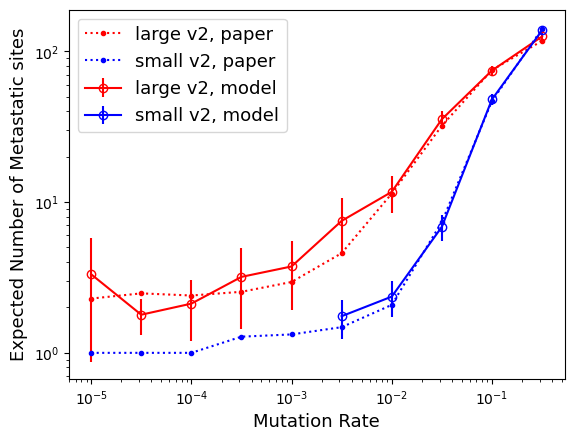

In [45]:
red_dot = [2.29, 2.48, 2.40, 2.54, 2.95, 4.58, 11.38, 32.05, 75.07, 117.13]
blue_dot = [1, 1, 1, 1.28, 1.325, 1.48, 2.08, 7.37, 46.70, 140.71]
mut_rate = [0.00001, 0.00003162, 0.0001, 0.0003162, 0.001,0.003162, 0.01, 0.03162, 0.1, 0.3162]
mut_rate_blue = [0.003162, 0.01, 0.03162, 0.1, 0.3162]

plt.figure()
plt.errorbar(mut_rate, s6b_red_mean, yerr=s6b_red_err, marker='o',markerfacecolor='none', linestyle='-', color='red', label='large v2, model')
plt.plot(mut_rate, red_dot, marker='.', linestyle=':', color='red', label='large v2, paper')
plt.errorbar(mut_rate_blue, s6b_blue_mean, yerr=s6b_blue_err, marker='o',markerfacecolor='none', linestyle='-', color='blue', label='small v2, model')
plt.plot(mut_rate, blue_dot, marker='.', linestyle=':', color='blue', label='small v2, paper')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mutation Rate', size=13)
plt.ylabel('Expected Number of Metastatic sites', size=13)
plt.legend(fontsize=13)

In [22]:
s6e_red = np.ones((10, 100))
s6f_red = np.ones((10, 100))
s6e_blue = np.ones((10, 100))
s6f_blue = np.ones((10, 100))

In [23]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.00001, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6e_red[0,n] = numsite_1
        s6f_red[0,n] = zcells_1
        n += 1

In [24]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.00003162, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6e_red[1,n] = numsite_1
        s6f_red[1,n] = zcells_1
        n += 1

In [25]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6e_red[2,n] = numsite_1
        s6f_red[2,n] = zcells_1
        n += 1

In [26]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0003162, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6e_red[3,n] = numsite_1
        s6f_red[3,n] = zcells_1
        n += 1

In [27]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.001, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6e_red[4,n] = numsite_1
        s6f_red[4,n] = zcells_1
        n += 1

In [28]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.003162, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6e_red[5,n] = numsite_1
        s6f_red[5,n] = zcells_1
        n += 1

In [29]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.01, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6e_red[6,n] = numsite_1
        s6f_red[6,n] = zcells_1
        n += 1

In [30]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.03162, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6e_red[7,n] = numsite_1
        s6f_red[7,n] = zcells_1
        n += 1

In [31]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.1, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6e_red[8,n] = numsite_1
        s6f_red[8,n] = zcells_1
        n += 1

In [32]:
num_run = 100
n = 0

while n < num_run:
    numsite_1, zcells_1, total_1, metastasis_1 = simulate(M1=250000, M2=250000, r=0.11, s1=0.11, s2=0.11, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.3162, v1=0.001, v2=0.1, eps=0, gam=0)
    
    if total_1 >= 250000 and metastasis_1 is True:
        s6e_red[9,n] = numsite_1
        s6f_red[9,n] = zcells_1
        n += 1

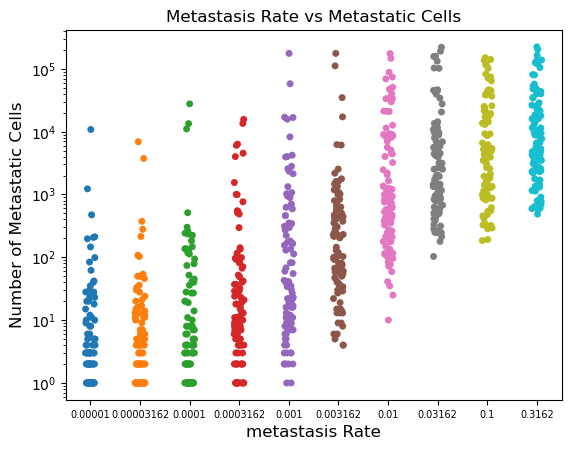

In [33]:
s6f_red_transposed = s6f_red.T
    
df_transposed = pd.DataFrame(s6f_red_transposed, columns=[f'Row {i+1}' for i in range(s6f_red_transposed.shape[1])])

custom_x_labels = ['0.00001', '0.00003162', '0.0001', '0.0003162', '0.001', '0.003162', '0.01', '0.03162', '0.1', '0.3162']
plt.figure()
ax = sns.stripplot(data=df_transposed)
ax.set_yscale('log')
plt.title('Metastasis Rate vs Metastatic Cells')
plt.xlabel('metastasis Rate', fontsize=12)
plt.ylabel('Number of Metastatic Cells', fontsize=12)
plt.xticks(ticks=range(len(custom_x_labels)), labels=custom_x_labels, fontsize=7)
plt.show()

In [47]:
s6f_red_mean = []
s6f_red_con = []
s6f_red_err = []

for n in range(10):
    s_mean = np.mean(s6f_red[n,:])
    s_std = np.std(s6f_red[n,:])
    confidence_level = 0.95
    degrees_freedom = 99
    s6f_red_mean.append(s_mean)
    confidence_interval_sites = stats.t.interval(confidence_level, degrees_freedom, s_mean, s_std/np.sqrt(num_run))
    s6f_red_con.append(confidence_interval_sites)
    
for n in range(10):
    err = s6f_red_mean[n] - s6f_red_con[n][0]
    s6f_red_err.append(err)

In [50]:
print(s6f_red_err)

[214.59139629091976, 154.18966124575752, 640.5209099304191, 449.9061678447127, 3674.8214810557984, 4143.803376636811, 5342.676479435461, 7978.263991935066, 6749.0484339753275, 8685.227314259955]


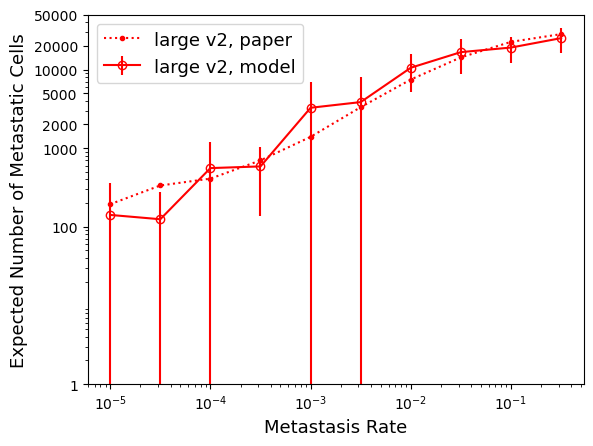

In [51]:
s6f_reddoted = [193.91, 335.20, 409.85, 699.31, 1393.33, 3319.95, 7460.94, 14267.79, 22465.67, 28174.53]

plt.figure()
plt.errorbar(mut_rate, s6f_red_mean,yerr=s6f_red_err, marker='o',markerfacecolor='none', linestyle='-', color='red', label='large v2, model')
plt.loglog(mut_rate, s6f_reddoted, marker='.', linestyle=':', color='red', label='large v2, paper')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Metastasis Rate', size=13)
plt.ylabel('Expected Number of Metastatic Cells', size=13)
plt.ylim([1, 50000])
plt.yticks([1,100, 1000, 2000, 5000, 10000, 20000, 50000])
plt.gca().set_yticklabels([1,100, 1000, 2000, 5000, 10000, 20000, 50000])
plt.legend(fontsize=13)
plt.savefig('desktop')

In [55]:
growth_vs_time = np.zeros((5,11))
g_rate = np.linspace(0.11, 0.31, num=11)

time_blue = []
total_blue = []
for g in g_rate:
    t_diag = 0
    while t_diag == 0:
        t, total, t_diag, t_final = simulate_time(M1=250000, M2=1000000, r=g, s1=g, s2=g, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.001, v2=0.0005, eps=0.99, gam=0)
        if total > 0:  
            time_blue.append(t)
            total_blue.append(total)

growth_vs_time[2,:] = time_blue

time_reddot = []
total_reddot = []
for g in g_rate:
    t_diag = 0
    while t_diag == 0:
        t, total, t_diag, t_final = simulate_time(M1=250000, M2=1000000, r=g, s1=g, s2=g, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.001, v2=0.0005, eps=0, gam=0.5)
        if total > 0:  
            time_reddot.append(t)
            total_reddot.append(total)

growth_vs_time[3,:] = time_reddot

time_red = []
total_red = []
for g in g_rate:
    t_diag = 0
    while t_diag == 0:
        t, total, t_diag, t_final = simulate_time(M1=250000, M2=1000000, r=g, s1=g, s2=g, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.001, v2=0.0005, eps=0, gam=0.9)
        if total > 0:  
            time_red.append(t)
            total_red.append(total)

growth_vs_time[1,:] = time_red

time_black = []
total_black = []
for g in g_rate:
    t_diag = 0
    while t_diag == 0:
        t, total, t_diag, t_final = simulate_time(M1=250000, M2=1000000, r=g, s1=g, s2=g, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.001, v2=0.0005, eps=0, gam=0)
        if total > 0:  
            time_black.append(t)
            total_black.append(total)

growth_vs_time[4,:] = time_black

time_purple = []
total_purple = []
for g in g_rate:
    t_diag = 0
    while t_diag == 0:
        t, total, t_diag, t_final = simulate_time(M1=250000, M2=1000000, r=g, s1=g, s2=g, s3=0.21, d=0.01, d1=0.01, d2=0.01, d3=0.01, q=0.0001, v1=0.001, v2=0.0005, eps=0.9, gam=0.9)
        if total > 0:  
            time_purple.append(t)
            total_purple.append(total)

growth_vs_time[0,:] = time_purple



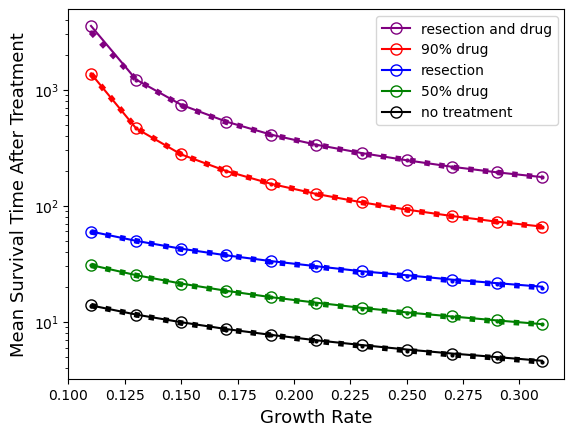

In [56]:
purple_dot = [3126, 1220, 730.9, 524.4, 407.5, 336.36, 280.75, 248.78, 214.31, 193.75, 175.27]
red_dot = [1363.4, 467.9, 277.2, 197.7, 154.9, 126.4, 106.7, 92.3, 80.9, 72.8, 65.6]
blue_dot = [59.5, 49.8, 42.2, 37.64, 32.65, 29.88, 26.55, 24.85, 22.66, 21.14, 19.70]
green_dot = [30.6, 25.08, 21.04, 18.32, 16.20, 14.35, 13.01, 11.90, 10.99, 10.06, 9.53]
black_dot = [13.79, 11.50, 9.77, 8.58, 7.67, 6.82, 6.19, 5.65, 5.20, 4.89, 4.51]

plt.semilogy(g_rate, growth_vs_time[0,:], marker='o',markerfacecolor='none',markersize=8, linestyle='-', color='purple', label='resection and drug')
plt.semilogy(g_rate, growth_vs_time[1,:], marker='o',markerfacecolor='none',markersize=8, linestyle='-', color='red', label='90% drug')
plt.semilogy(g_rate, growth_vs_time[2,:], marker='o',markerfacecolor='none',markersize=8, linestyle='-', color='blue', label='resection')
plt.semilogy(g_rate, growth_vs_time[3,:], marker='o',markerfacecolor='none',markersize=8, linestyle='-', color='green', label='50% drug')
plt.semilogy(g_rate, growth_vs_time[4,:], marker='o',markerfacecolor='none',markersize=8, linestyle='-', color='black', label='no treatment')

plt.semilogy(g_rate, purple_dot, marker='.',markersize=4, linestyle=':',linewidth=4, color='purple')
plt.semilogy(g_rate, red_dot, marker='.',markersize=4, linestyle=':',linewidth=4, color='red')
plt.semilogy(g_rate, blue_dot, marker='.',markersize=4, linestyle=':',linewidth=4, color='blue')
plt.semilogy(g_rate, green_dot, marker='.',markersize=4, linestyle=':',linewidth=4, color='green')
plt.semilogy(g_rate, black_dot, marker='.',markersize=4, linestyle=':',linewidth=4, color='black')

plt.xlabel('Growth Rate', size=13)
plt.ylabel('Mean Survival Time After Treatment', size=13)
plt.legend()
